## Heart disease prediction

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [2]:
url="https://drive.google.com/file/d/1IxrVWs7TnDBKTQX55SldCy5pR9Jb-Oh6/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df_dup=df.duplicated().any()
df_dup

True

In [8]:
df.info

<bound method DataFrame.info of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [9]:
df_dup=df.duplicated().any()
df_dup

True

In [10]:
#Check duplicate rows in data
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (1, 14)


In [11]:
#we have one duplicate row.
#Removing the duplicate row
df = df.drop_duplicates()
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)
#Number of duplicate rows after dropping one duplicate row

Number of duplicate rows ::  (0, 14)


In [12]:
#Looking for null values
print("Null values :: ")
print(df.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [13]:
df.shape

(302, 14)

In [14]:
import seaborn as sns

<AxesSubplot:xlabel='thall'>

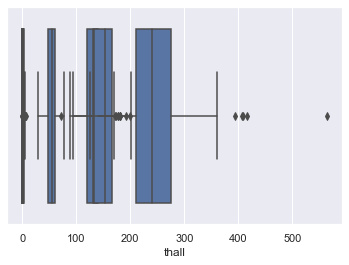

In [15]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# 1. Detecting Outliers using IQR (InterQuartile Range)
sns.boxplot(x=df['age'])
#No Outliers observed in 'age'
sns.boxplot(x=df['sex'])
#No outliers observed in sex data
sns.boxplot(x=df['cp'])
#No outliers in 'cp'
sns.boxplot(x=df['trtbps'])
#Some outliers are observed in 'trtbps'. They will be removed later
sns.boxplot(x=df['chol'])
#Some outliers are observed in 'chol'. They will be removed later
sns.boxplot(x=df['fbs'])
sns.boxplot(x=df['restecg'])
sns.boxplot(x=df['thalachh'])
#Outliers present in thalachh
sns.boxplot(x=df['exng'])
sns.boxplot(x=df['oldpeak'])
#Outliers are present in 'OldPeak'
sns.boxplot(x=df['slp'])
sns.boxplot(x=df['caa'])
#Outliers are present in 'caa'
sns.boxplot(x=df['thall'])

In [16]:
#Find the InterQuartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print('*********** InterQuartile Range ***********')
print(IQR)
# Remove the outliers using IQR
data2 = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
data2.shape

*********** InterQuartile Range ***********
age         13.00
sex          1.00
cp           2.00
trtbps      20.00
chol        63.75
fbs          0.00
restecg      1.00
thalachh    32.75
exng         1.00
oldpeak      1.60
slp          1.00
caa          1.00
thall        1.00
output       1.00
dtype: float64


(228, 14)

In [17]:
import numpy as np
#Removing outliers using Z-score
z = np.abs(stats.zscore(df))
data3 = df[(z<3).all(axis=1)]
data3.shape

(287, 14)

Text(0.5, 1.0, 'Pearson Correlation')

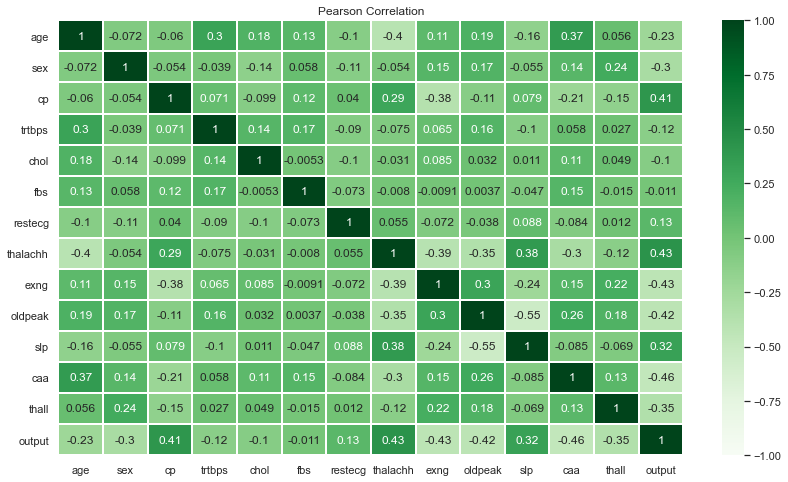

In [18]:
#Finding the correlation between variables
pearsonCorr = data3.corr(method='pearson')
spearmanCorr = data3.corr(method='spearman')
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Greens", annot=True, linewidth=0.1)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Pearson Correlation')

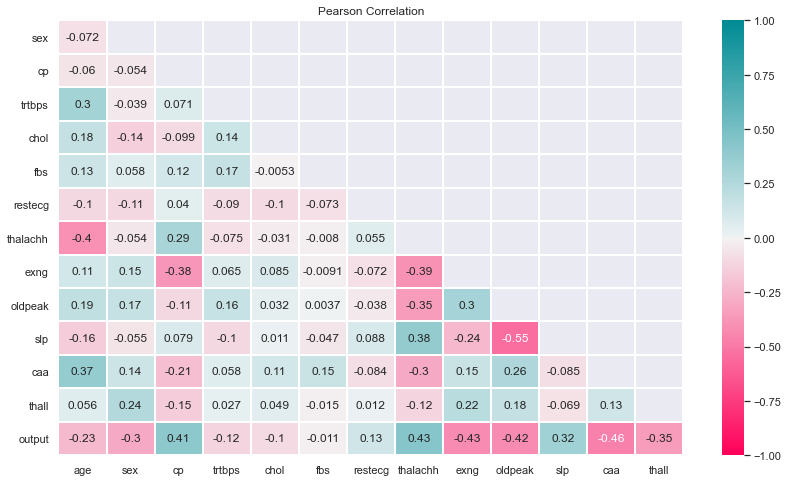

In [19]:
#Create mask for both correlation matrices
#Pearson corr masking
#Generating mask for upper triangle
maskP = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskP = maskP[1:,:-1]
pCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 200, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(pCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskP)
plt.title("Pearson Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

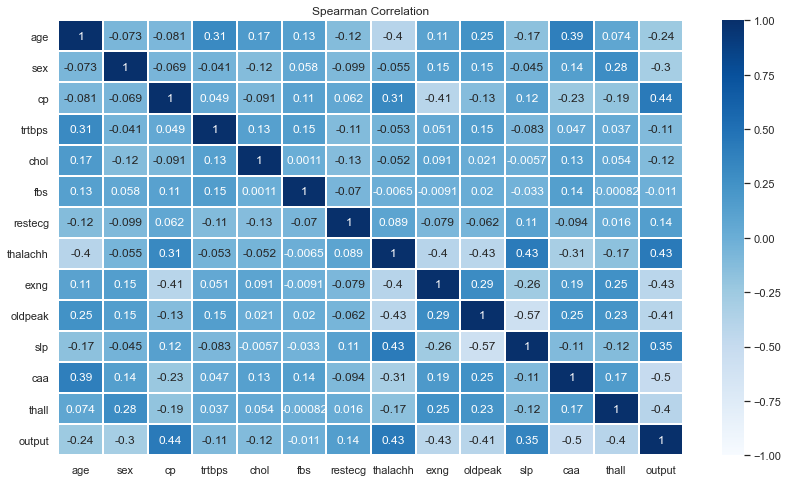

In [20]:
fig = plt.subplots(figsize=(14,8))
sns.heatmap(spearmanCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True, linewidth=0.1)
plt.title("Spearman Correlation")

Text(0.5, 1.0, 'Spearman Correlation')

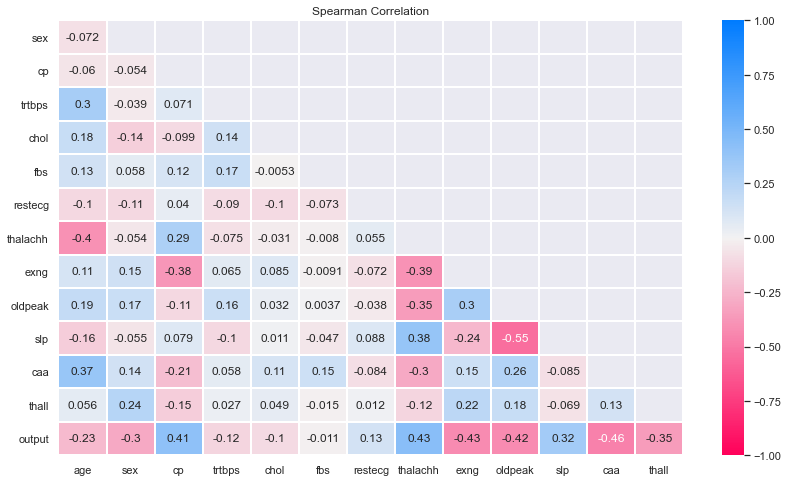

In [21]:
#Create mask for both correlation matrices
#Spearson corr masking
#Generating mask for upper triangle
maskS = np.triu(np.ones_like(pearsonCorr,dtype=bool))
#Adjust mask and correlation
maskS = maskS[1:,:-1]
sCorr = pearsonCorr.iloc[1:,:-1].copy()
#Setting up a diverging palette
cmap = sns.diverging_palette(0, 250, 150, 50, as_cmap=True)
fig = plt.subplots(figsize=(14,8))
sns.heatmap(sCorr, vmin=-1,vmax=1, cmap = cmap, annot=True, linewidth=0.3, mask=maskS)
plt.title("Spearman Correlation")

In [22]:
#From this we observe that the minimum correlation between output and other features in
#fbs,trtbps and chol
x = data3.drop("output", axis=1)
y = data3["output"]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=23,test_size=0.3)

In [23]:
print(type(x_train))
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [24]:
x_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [25]:
#Building classification models
names = ['Age', 'Sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
#   ****************Logistic Regression*****************
logReg = LogisticRegression(random_state=0, solver='liblinear')
logReg.fit(x_train, y_train)
#Check accuracy of Logistic Regression
y_pred_logReg = logReg.predict(x_test)
#Model Accuracy
print("Accuracy of logistic regression classifier :: " ,metrics.accuracy_score(y_test,y_pred_logReg))
#Removing the features with low correlation and checking effect on accuracy of model
x_train1 = x_train.drop("fbs",axis=1)
x_train1 = x_train1.drop("trtbps", axis=1)
x_train1 = x_train1.drop("chol", axis=1)
x_train1 = x_train1.drop("restecg", axis=1)
x_test1 = x_test.drop("fbs", axis=1)
x_test1 = x_test1.drop("trtbps", axis=1)
x_test1 = x_test1.drop("chol", axis=1)
x_test1 = x_test1.drop("restecg", axis=1)
logReg1 = LogisticRegression(random_state=0, solver='liblinear').fit(x_train1,y_train)
y_pred_logReg1 = logReg1.predict(x_test1)
print("nAccuracy of logistic regression classifier after removing features:: " ,metrics.accuracy_score(y_test,y_pred_logReg1))

Accuracy of logistic regression classifier ::  0.896551724137931
nAccuracy of logistic regression classifier after removing features::  0.8505747126436781


In [26]:
# Using Random forest classifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))
#Find the score of each feature in model and drop the features with low scores
f_imp = rf.feature_importances_
for i,v in enumerate(f_imp):
    print('Feature: %s, Score: %.5f' % (names[i],v))

Accuracy of Random Forest Classifier ::  0.8735632183908046
Feature: Age, Score: 0.11303
Feature: Sex, Score: 0.03264
Feature: cp, Score: 0.11342
Feature: trtbps, Score: 0.07702
Feature: chol, Score: 0.08515
Feature: fbs, Score: 0.01076
Feature: restecg, Score: 0.01932
Feature: thalachh, Score: 0.12796
Feature: exng, Score: 0.03212
Feature: oldpeak, Score: 0.11152
Feature: slp, Score: 0.05428
Feature: caa, Score: 0.12036
Feature: thall, Score: 0.10241


In [27]:
#Models and their accuracy
print("*****************Models and their accuracy*****************")
print("Logistic Regression Classifier :: ", metrics.accuracy_score(y_test,y_pred_logReg1))
print("Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf))

*****************Models and their accuracy*****************
Logistic Regression Classifier ::  0.8505747126436781
Random Forest Classifier ::  0.8735632183908046


### Saving Trained Model

In [28]:
# saving model
import pickle

with open("./SavedModels/model2","wb") as f:
    pickle.dump(rf,f)

In [29]:
# loading saved model
with open("./SavedModels/model2","rb") as f:
    lr=pickle.load(f)

In [30]:
lr.predict(x_test)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [31]:
    age=int(input("Enter Age: "))

    print("press[1] for Male, press[0] for Female")
    sex=int(input("Enter sex: "))

    print("[1] for typical angina,[2] for atypical angina,[3] for non-anginal pain,[4] for asymptomatic")
    cp=int(input("Enter chest pain type: "))

    trtbps=int(input("Enter resting blood pressure (in mm Hg): "))

    chol=int(input("Enter cholestoral in mg/dl fetched via BMI sensor: "))

    fbs=int(input("Enter (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false): "))

    print("[0] for normal,[1] for having ST-T wave abnormality,[2] for showing probable")
    restecg=int(input("Enter resting electrocardiographic results: "))

    thalachh=int(input("Enter maximum heart rate achieved: "))

    exng=int(input("Enter exercise induced angina (1 = yes; 0 = no): "))

    oldpeak=float(input("Enter oldpeak: "))
    slp=int(input("Enter slp: "))

    caa=int(input("Enter number of major vessels (0-3): "))

    thall=int(input("Enter thall: "))

Enter Age: 63
press[1] for Male, press[0] for Female
Enter sex: 1
[1] for typical angina,[2] for atypical angina,[3] for non-anginal pain,[4] for asymptomatic
Enter chest pain type: 3
Enter resting blood pressure (in mm Hg): 145
Enter cholestoral in mg/dl fetched via BMI sensor: 233
Enter (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false): 1
[0] for normal,[1] for having ST-T wave abnormality,[2] for showing probable
Enter resting electrocardiographic results: 0
Enter maximum heart rate achieved: 150
Enter exercise induced angina (1 = yes; 0 = no): 0
Enter oldpeak: 2.3
Enter slp: 0
Enter number of major vessels (0-3): 0
Enter thall: 1


In [39]:
lst=[[age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall]]

In [40]:
lst

[[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

In [41]:
print(type(lst))

<class 'list'>


In [42]:
d=pd.DataFrame(lst)

In [43]:
print(type(d))

<class 'pandas.core.frame.DataFrame'>


In [45]:
value=lr.predict(lst)

In [46]:
print(type(value))

<class 'numpy.ndarray'>


In [47]:
print(value)

[1]


In [48]:
if value==1:
    print("More chance of heart attack")
else:
    print("less chance of heart attack")

More chance of heart attack
